# A pretrained model to classify image

In [1]:
from torchvision import models

In [36]:
# List of available modles in PyTorch
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

### Creating an instance of Resnet101 model, also loading its pre-trained weights

In [4]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\rsani/.cache\torch\checkpoints\resnet101-5d3b4d8f.pth


In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Image Preprocessing Pipeline for ResNet

In [7]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485,0.456,0.406],
        std=[0.229, 0.224,0.225]
    )
])

### Loading Image

In [8]:
from PIL import Image

In [13]:
img = Image.open("D:/Code/Resources/Data/PetImages/Dog/10.jpg")

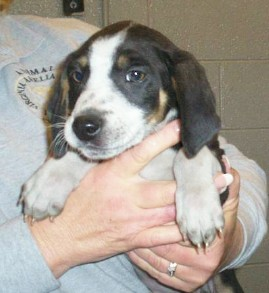

In [14]:
img

### Preprocessing image

In [15]:
img_t = preprocess(img)

In [16]:
import torch

In [17]:
batch_t = torch.unsqueeze(img_t, 0)

### Put Model in Evaluation mode and Predict

In [18]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [19]:
out = resnet(batch_t)
out

tensor([[ 5.9935e-01, -1.8391e+00, -1.5270e+00, -1.7359e+00, -2.2209e+00,
          9.4174e-02, -1.8642e+00, -8.6467e-01, -1.4290e+00, -3.0620e+00,
          6.8553e-01, -1.3140e+00, -2.6437e+00, -1.1837e+00, -1.0481e+00,
         -9.4749e-01, -1.8655e+00, -2.2519e+00, -1.6164e+00, -3.4632e-01,
         -1.5717e+00, -7.7770e-01, -1.8047e+00, -1.8497e+00, -1.5621e+00,
         -5.4519e-01,  1.3010e+00, -1.4821e+00,  2.8014e-01, -8.6536e-01,
         -1.9431e-02, -5.4249e-01,  1.4595e+00,  1.8077e+00,  3.1510e+00,
          1.8537e+00,  2.7550e+00,  1.4085e+00,  1.6979e+00, -5.1738e-01,
         -4.8471e-01,  1.8561e+00,  1.1194e+00,  1.5593e+00, -3.6323e-02,
         -8.2278e-01, -1.5204e+00, -3.5316e-01, -9.7608e-01, -1.6612e+00,
         -1.8726e+00, -1.1209e+00,  1.4451e+00,  6.3649e-01,  1.2245e-01,
         -2.6969e+00,  1.8741e+00,  8.4867e-01, -1.6136e+00,  1.0779e+00,
          1.3963e+00,  1.2253e+00,  1.8745e+00,  1.1405e+00, -2.9952e-01,
         -1.7127e+00,  5.7863e-01, -1.

### Reading Labels and Seeing Prdictions

In [29]:
with open("D:/Code/Resources/Data/imagenet_classes") as f:
    labels = [line.split(",")[1].strip() for line in f.readlines()]
labels

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house_finch',
 'junco',
 'indigo_bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water_ouzel',
 'kite',
 'bald_eagle',
 'vulture',
 'great_grey_owl',
 'European_fire_salamander',
 'common_newt',
 'eft',
 'spotted_salamander',
 'axolotl',
 'bullfrog',
 'tree_frog',
 'tailed_frog',
 'loggerhead',
 'leatherback_turtle',
 'mud_turtle',
 'terrapin',
 'box_turtle',
 'banded_gecko',
 'common_iguana',
 'American_chameleon',
 'whiptail',
 'agama',
 'frilled_lizard',
 'alligator_lizard',
 'Gila_monster',
 'green_lizard',
 'African_chameleon',
 'Komodo_dragon',
 'African_crocodile',
 'American_alligator',
 'triceratops',
 'thunder_snake',
 'ringneck_snake',
 'hognose_snake',
 'green_snake',
 'king_snake',
 'garter_snake',
 'water_snake',
 'vine_snake',
 'night_snake',
 'boa_constrictor',
 'rock_python',
 'Indian_cobr

In [23]:
_, index = torch.max(out, 1)

In [37]:
# Listing Prediction, also calculating roughly akin to the model confidence for predition
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
labels[index[0]], percentage[index[0]].item()

('Walker_hound', 60.44902801513672)

In [31]:
_, indices = torch.sort(out, descending=True)

In [38]:
# Listing Top 5 Predictions, also the model confidence for preditions
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Walker_hound', 60.44902801513672),
 ('bluetick', 25.959856033325195),
 ('basset', 5.843393802642822),
 ('beagle', 3.6226656436920166),
 ('English_foxhound', 1.481561303138733)]